In [1]:
# Import dependencies #

import altair as alt
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif


weather_by_date = pd.read_csv('full_weather_data.csv')
weather_by_date.head().T

,0,1,2,3,4
datetime,2019-01-01,2019-01-03,2019-01-04,2019-01-07,2019-01-08
dew,31.4,43.2,50.1,31.0,34.4
humidity,91.4,89.2,85.9,71.6,87.7
precip,0.583,0.172,1.227,0.064,0.151
windgust,21.9,0.0,34.2,51.4,23.0
windspeed,11.4,8.6,18.9,18.5,8.6
winddir,315.9,250.5,207.4,234.9,108.0
pressure,1024.8,1016.9,1008.9,1017.4,1013.3
cloudcover,99.5,65.9,77.6,68.7,94.2
visibility,5.6,8.0,6.5,9.0,5.9


In [2]:
numeric_columns = ['dew', 'humidity','precip', 'windgust','windspeed', 'winddir', 'pressure', 'cloudcover','visibility', 'solarradiation',
'solarenergy', 'uvindex', 'Temp_Difference']

corr_matrix = weather_by_date[numeric_columns].corr()

corr_matrix

,dew,humidity,precip,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,Temp_Difference
dew,1.000000,0.524658,0.239156,0.040320,-0.074262,-0.131635,-0.363249,0.171755,-0.118530,0.011216,0.011562,0.095121,-0.270295
humidity,0.524658,1.000000,0.413716,-0.064304,-0.073869,-0.104865,-0.133580,0.556113,-0.525895,-0.461765,-0.461565,-0.517988,-0.533198
precip,0.239156,0.413716,1.000000,0.243180,0.174564,-0.108363,-0.233437,0.363463,-0.441837,-0.275627,-0.276890,-0.299998,-0.297987
windgust,0.040320,-0.064304,0.243180,1.000000,0.715766,0.025615,-0.423921,0.118301,-0.024879,-0.018470,-0.018824,0.005466,-0.028002
windspeed,-0.074262,-0.073869,0.174564,0.715766,1.000000,0.056817,-0.396739,0.148534,0.005388,-0.087628,-0.087660,-0.070767,-0.046688
winddir,-0.131635,-0.104865,-0.108363,0.025615,0.056817,1.000000,-0.104107,-0.097322,0.066274,0.037699,0.038154,0.044182,0.080543
pressure,-0.363249,-0.133580,-0.233437,-0.423921,-0.396739,-0.104107,1.000000,-0.204393,0.119045,0.036058,0.035910,0.029384,0.137145
cloudcover,0.171755,0.556113,0.363463,0.118301,0.148534,-0.097322,-0.204393,1.000000,-0.444292,-0.527129,-0.526710,-0.569991,-0.630585
visibility,-0.118530,-0.525895,-0.441837,-0.024879,0.005388,0.066274,0.119045,-0.444292,1.000000,0.277640,0.278101,0.426311,0.324667
solarradiation,0.011216,-0.461765,-0.275627,-0.018470,-0.087628,0.037699,0.036058,-0.527129,0.277640,1.000000,0.999873,0.757347,0.438357


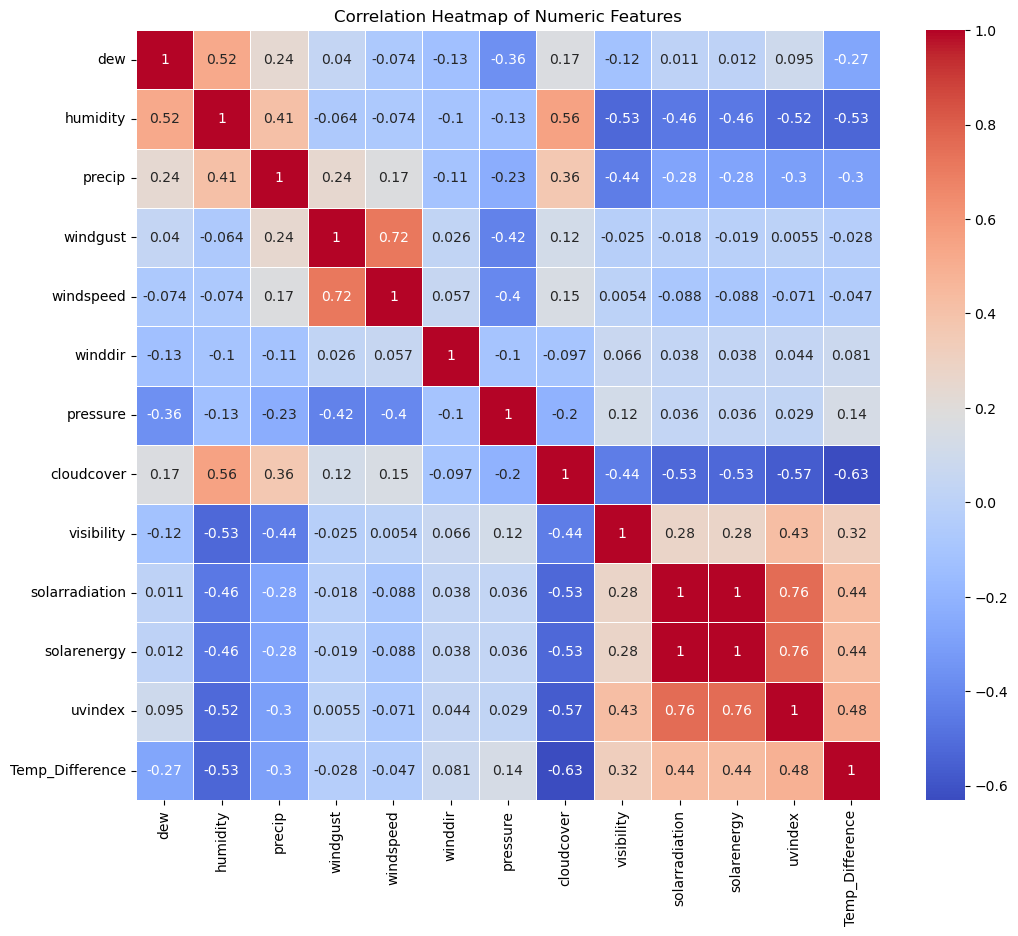

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [4]:
correlation_matrix = weather_by_date.corr()
tornado_correlations = correlation_matrix['Tornado'].sort_values(ascending=False)
print(tornado_correlations)

Tornado            1.000000
precip             0.416424
windgust           0.399971
windspeed          0.359600
dew                0.328409
cloudcover         0.318835
humidity           0.318689
winddir           -0.066370
solarradiation    -0.161117
uvindex           -0.161373
solarenergy       -0.161538
Temp_Difference   -0.202332
visibility        -0.202605
pressure          -0.453960
Name: Tornado, dtype: float64


C:\Users\Jwarn\AppData\Local\Temp\ipykernel_22448\2891951722.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = weather_by_date.corr()


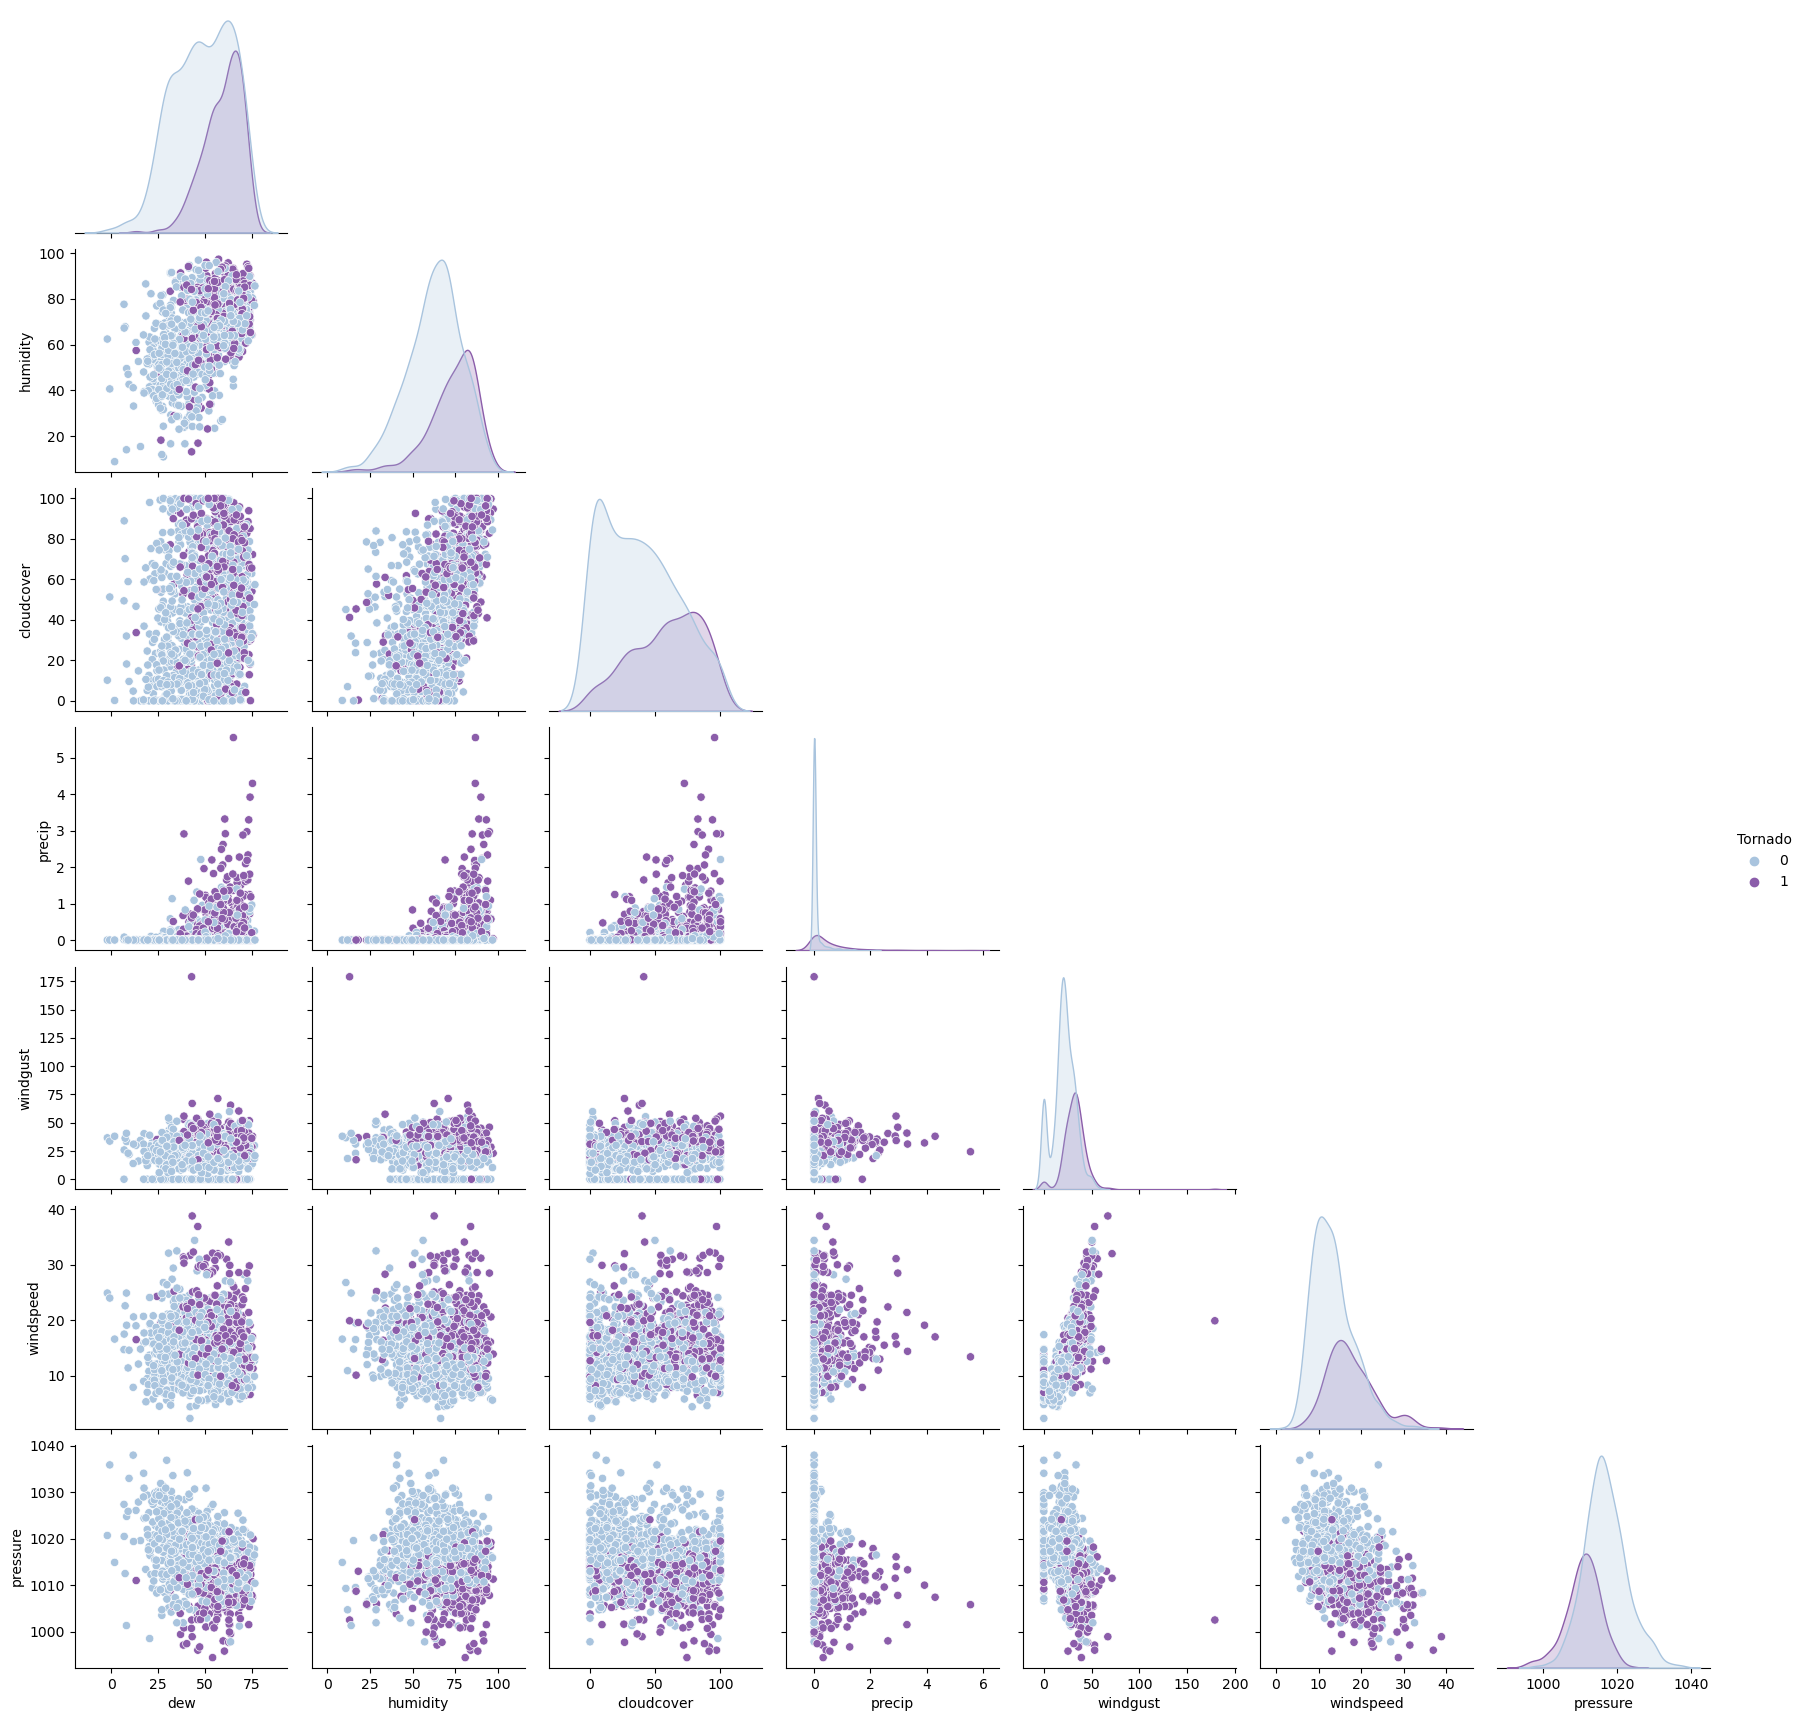

In [5]:

sns.pairplot(data=weather_by_date[['Tornado', 'dew', 'humidity', 'cloudcover', 'precip', 'windgust', 'windspeed', 'pressure']], corner=True, hue='Tornado',palette='BuPu')

In [15]:
wind_threshold = weather_by_date['windspeed'].median()  # 75th percentile
weather_by_date['high_wind'] = (weather_by_date['windspeed'] > wind_threshold).astype(int)

precip_threshold = 0.5  # Example threshold in inches
weather_by_date['heavy_rain'] = (weather_by_date['precip'] > precip_threshold).astype(int)

weather_by_date['severe_conditions'] = ((weather_by_date['windspeed'] > wind_threshold) & 
                           (weather_by_date['precip'] > precip_threshold)).astype(int)

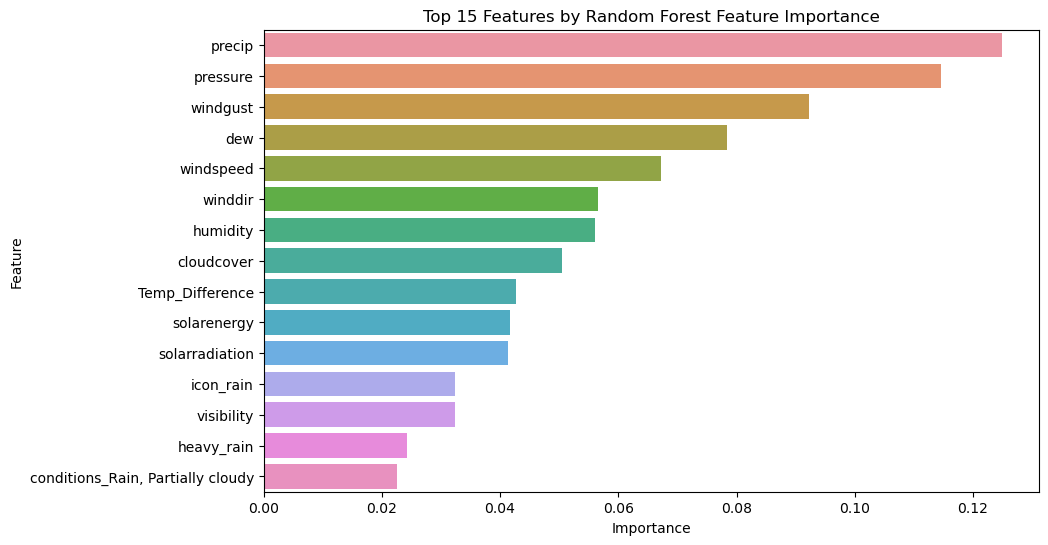

In [16]:
from sklearn.ensemble import RandomForestClassifier
X = weather_by_date.drop(['Tornado', 'datetime'], axis=1)  # Remove target and datetime
y = weather_by_date['Tornado']
X = pd.get_dummies(X, columns=['icon', 'Region', 'conditions'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


importance = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features by Random Forest Feature Importance')
plt.show()

In [17]:
feature_selection = weather_by_date.drop(columns = ['solarradiation', 'Temp_Difference', 'solarenergy','visibility','conditions', 'uvindex'])

In [18]:
weather_by_date['severe_conditions'].value_counts()

0    1137
1     116
Name: severe_conditions, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



X = feature_selection.drop(['Tornado', 'datetime'], axis=1)
y = feature_selection['Tornado']

X = pd.get_dummies(X, columns=['Region', 'icon'])

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
scaler = StandardScaler()

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

class_weight = {0: 1, 1: 5} 
rf_model = RandomForestClassifier(
    n_estimators=500, 
    max_depth=None,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    class_weight=class_weight
)

rf_model.fit(X_train_scaled, y_train_resampled)

y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_custom = (y_pred_proba > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred_custom))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       172
           1       0.73      0.75      0.74        79

    accuracy                           0.83       251
   macro avg       0.81      0.81      0.81       251
weighted avg       0.83      0.83      0.83       251


Confusion Matrix:
[[150  22]
 [ 20  59]]

ROC AUC Score:
0.8983662054754196


In [20]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.81673307 0.812749   0.84063745 0.828      0.812     ]
Mean CV score: 0.8220239043824702


In [21]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 important features:")
print(feature_importance.head(10))


Top 10 important features:
           feature  importance
0              dew    0.153710
6         pressure    0.142907
3         windgust    0.124649
4        windspeed    0.096208
5          winddir    0.087701
2           precip    0.076914
1         humidity    0.069962
7       cloudcover    0.065369
23       icon_rain    0.052097
20  icon_clear-day    0.024217


In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}]
}

rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                               param_distributions=param_dist, 
                               n_iter=100, cv=5, verbose=2, 
                               random_state=42, n_jobs=-1,
                               scoring='recall')  # Focus on recall
rf_random.fit(X_train_scaled, y_train_resampled)

print("Best parameters:", rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'class_weight': {0: 1, 1: 5}}


In [23]:
y_pred_best = rf_random.predict(X_test_scaled)
y_pred_proba_best = rf_random.predict_proba(X_test_scaled)[:, 1]

print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))

print("\nBest Model ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_best))

print("\nBest Model Confusion Matrix")
print(confusion_matrix(y_test, y_pred_best))


Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       172
           1       0.57      0.89      0.69        79

    accuracy                           0.75       251
   macro avg       0.75      0.79      0.74       251
weighted avg       0.82      0.75      0.76       251


Best Model ROC AUC Score:
0.9072711215778628

Best Model Confusion Matrix
[[119  53]
 [  9  70]]
